In [4]:
import requests
import pandas as pd
import plotnine as p9
from IPython.core.display import display, HTML
import os
from matplotlib import gridspec
import matplotlib.pyplot as plt
import json
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

# Authentication Token

Grab a token from: https://developer.spotify.com/console/get-current-user/

In [89]:
TOKEN = ""
track_end_point = "https://api.spotify.com/v1/me/top/tracks?time_range=short_term&limit=50"
headers = {"Authorization": f"Bearer {TOKEN}", "Accept": "application/json"}
feature_end_point = "https://api.spotify.com/v1/audio-features"

In [39]:
songs_file = "top_songs.csv"
if not os.path.exists(songs_file):
    songs = pd.DataFrame()
    response = requests.get(track_end_point, headers=headers)
    batch = pd.DataFrame.from_dict(response.json()['items'])
    songs = songs.append(batch)
    songs.to_csv(songs_file)
else:
    songs = pd.read_csv(songs_file, index_col=0)

In [40]:
songs.head()

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AU, BE, BH, BO, BR, CA, CL, CO, C...",1,170857,False,{'isrc': 'NLZ541700307'},{'spotify': 'https://open.spotify.com/track/7I...,https://api.spotify.com/v1/tracks/7IToVuRoN3NP...,7IToVuRoN3NP3mJzLe0RXt,False,Fade Away (feat. INNA),52,https://p.scdn.co/mp3-preview/1a6761e99c5988f8...,2,track,spotify:track:7IToVuRoN3NP3mJzLe0RXt
1,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,187118,False,{'isrc': 'DK4YA1907701'},{'spotify': 'https://open.spotify.com/track/5h...,https://api.spotify.com/v1/tracks/5hB4uV5XGpTE...,5hB4uV5XGpTE5pnxHv36EF,False,Make That Call,41,https://p.scdn.co/mp3-preview/6a6d3a3edac314f9...,1,track,spotify:track:5hB4uV5XGpTE5pnxHv36EF
2,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, BE, BG, BH, BO, BR, CA, CH, C...",1,190933,False,{'isrc': 'DK4YA1816201'},{'spotify': 'https://open.spotify.com/track/3v...,https://api.spotify.com/v1/tracks/3vZbmIvjbU0m...,3vZbmIvjbU0m5p0ZLaKRbE,False,Wild Ones,45,https://p.scdn.co/mp3-preview/8f5b43ba6e1c7f7b...,1,track,spotify:track:3vZbmIvjbU0m5p0ZLaKRbE
3,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,194181,False,{'isrc': 'CHB701800173'},{'spotify': 'https://open.spotify.com/track/4I...,https://api.spotify.com/v1/tracks/4IXAvmNBFinL...,4IXAvmNBFinLJJAuqpBK7Y,False,Getaway,56,https://p.scdn.co/mp3-preview/d62985d52809d308...,1,track,spotify:track:4IXAvmNBFinLJJAuqpBK7Y
4,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",2,186610,False,{'isrc': 'NLZ541701232'},{'spotify': 'https://open.spotify.com/track/7u...,https://api.spotify.com/v1/tracks/7uqS1gGcgWD0...,7uqS1gGcgWD0wiiKttEmyp,False,Wishing Well (feat. Olivia Sebastianelli),53,https://p.scdn.co/mp3-preview/d84294a0587b89d3...,1,track,spotify:track:7uqS1gGcgWD0wiiKttEmyp


In [41]:
features_file = "features.csv"
ids = list(songs.id)
if not os.path.exists(features_file):
    features = pd.DataFrame()
    req = ",".join(map(str, ids))
    response = requests.get(feature_end_point, params={"ids": req}, headers=headers)
    batch = pd.DataFrame.from_dict(response.json()['audio_features'])
    features = features.append(batch)
    features.to_csv(features_file)
else:
    features = pd.read_csv(features_file, index_col=0)

In [42]:
features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.690,0.713,4,-3.246,0,0.0329,0.0314,0.000000,0.3370,0.388,105.060,audio_features,7IToVuRoN3NP3mJzLe0RXt,spotify:track:7IToVuRoN3NP3mJzLe0RXt,https://api.spotify.com/v1/tracks/7IToVuRoN3NP...,https://api.spotify.com/v1/audio-analysis/7ITo...,170857,4
1,0.787,0.670,6,-5.484,1,0.0369,0.2080,0.000018,0.0465,0.580,118.064,audio_features,5hB4uV5XGpTE5pnxHv36EF,spotify:track:5hB4uV5XGpTE5pnxHv36EF,https://api.spotify.com/v1/tracks/5hB4uV5XGpTE...,https://api.spotify.com/v1/audio-analysis/5hB4...,187119,4
2,0.747,0.586,5,-5.774,1,0.0491,0.4510,0.000000,0.2520,0.783,91.995,audio_features,3vZbmIvjbU0m5p0ZLaKRbE,spotify:track:3vZbmIvjbU0m5p0ZLaKRbE,https://api.spotify.com/v1/tracks/3vZbmIvjbU0m...,https://api.spotify.com/v1/audio-analysis/3vZb...,190933,4
3,0.742,0.836,6,-3.501,1,0.0356,0.2240,0.000000,0.1110,0.673,110.031,audio_features,4IXAvmNBFinLJJAuqpBK7Y,spotify:track:4IXAvmNBFinLJJAuqpBK7Y,https://api.spotify.com/v1/tracks/4IXAvmNBFinL...,https://api.spotify.com/v1/audio-analysis/4IXA...,194182,4
4,0.698,0.653,9,-6.365,1,0.0521,0.4240,0.000000,0.3210,0.381,100.976,audio_features,7uqS1gGcgWD0wiiKttEmyp,spotify:track:7uqS1gGcgWD0wiiKttEmyp,https://api.spotify.com/v1/tracks/7uqS1gGcgWD0...,https://api.spotify.com/v1/audio-analysis/7uqS...,186610,4


In [47]:
columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

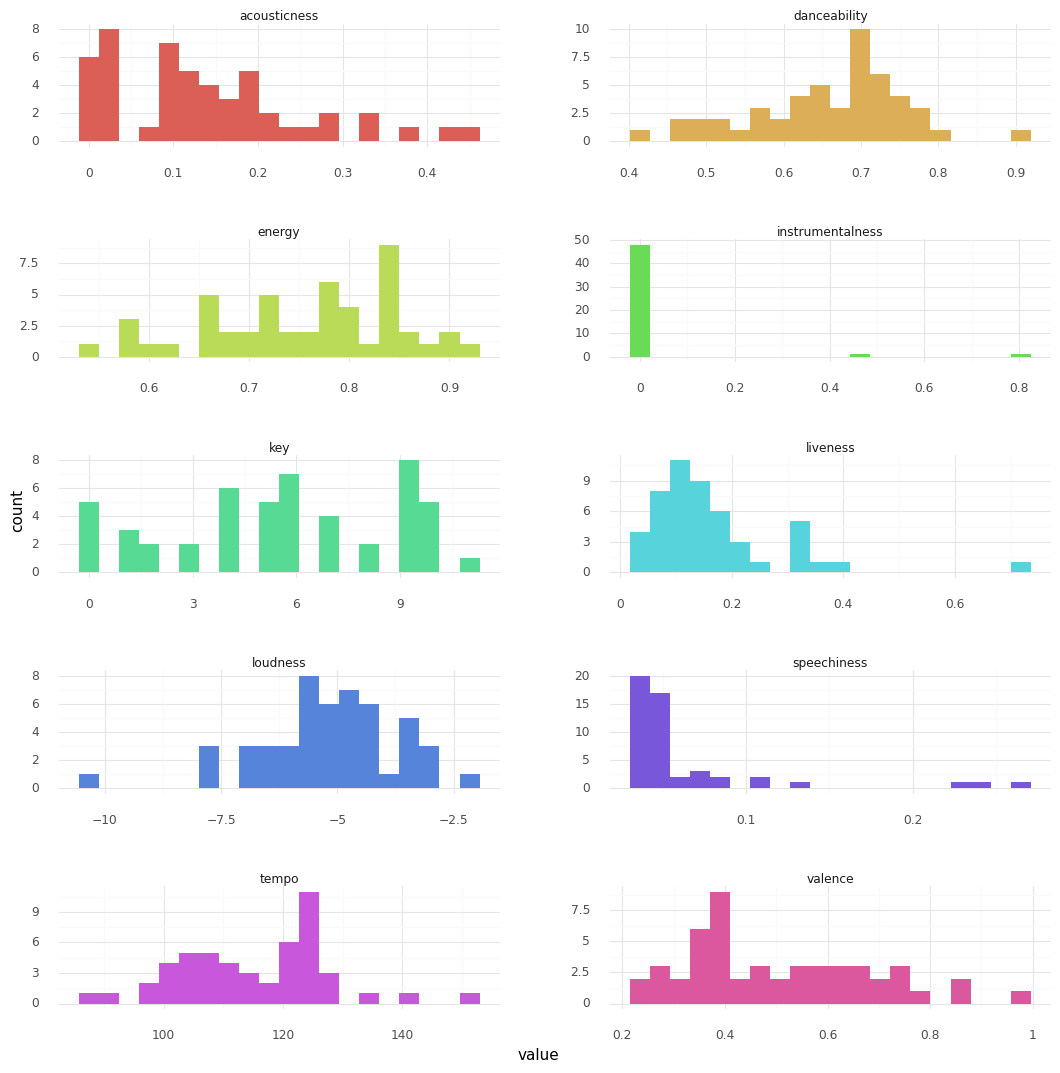

<ggplot: (8790538044760)>

In [48]:
melt = pd.melt(features[columns])
p9.options.set_option('figure_size', (12.8, 12.8))
(
    p9.ggplot(melt) + 
    p9.geom_histogram(p9.aes(x='value', fill='variable'), bins=20, show_legend=False) + 
    p9.theme_minimal() +
    p9.facet_wrap('variable', scales='free', nrow=6, ncol=2) + 
    p9.theme(subplots_adjust={'wspace': 0.25, 'hspace': 0.75})
)

# UMAP

In [90]:
import umap

In [91]:
reducer = umap.UMAP()

In [135]:
embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=3
).fit_transform(features[columns])

In [136]:
df = pd.DataFrame({'x': embedding[:, 0], 'y': embedding[:, 1], 'z': embedding[:, 2]})
reduced = df.join(features, how='inner')
joined = reduced.merge(songs, on='id',how='inner')

In [137]:
joined['artist_flat'] = joined.artists.apply(lambda artists: [i['name']for i in json.loads(json.dumps(artists))])

In [138]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist

In [139]:
d = []
K = range(1,10)
for k in K:
    kmean_model = KMeans(n_clusters=k).fit(features[columns])
    d.append(kmean_model.inertia_)
distortions = pd.DataFrame(d, columns=["error"])
distortions

,error
0,8502.123373
1,2951.162691
2,1837.628301
3,1320.174099
4,1038.680814
5,853.998275
6,703.530029
7,561.048490
8,470.656435


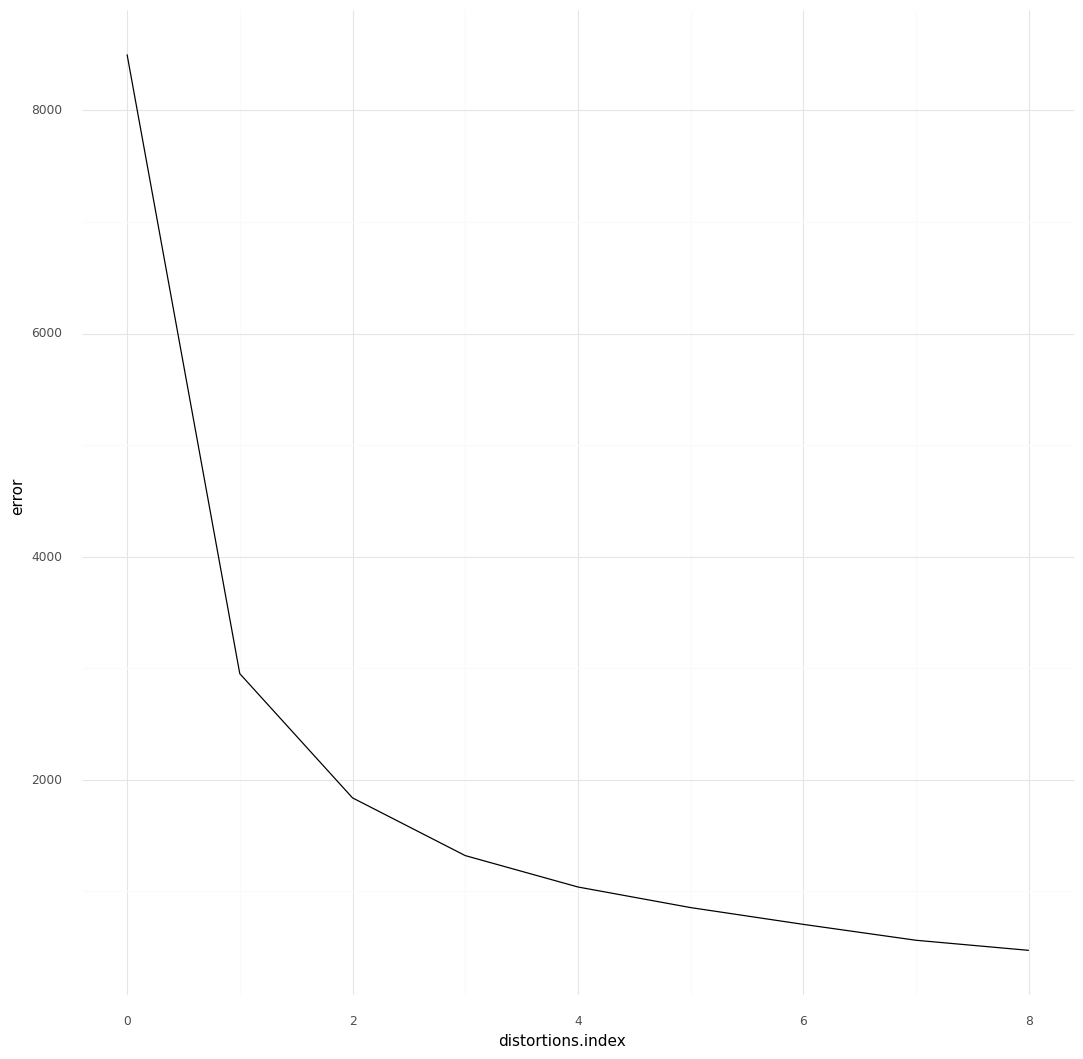

<ggplot: (8790527800908)>

In [140]:
(
    p9.ggplot(distortions) + 
    p9.geom_line(p9.aes(x="distortions.index", y="error")) + 
    p9.theme_minimal()
)

In [141]:
kmean_model = KMeans(n_clusters=5).fit(features[columns])
joined['labels'] = kmean_model.labels_
joined["text"] = joined["name"].astype(str) + joined["artist_flat"].astype(str)
joined['labels'] = joined['labels'].astype('category')

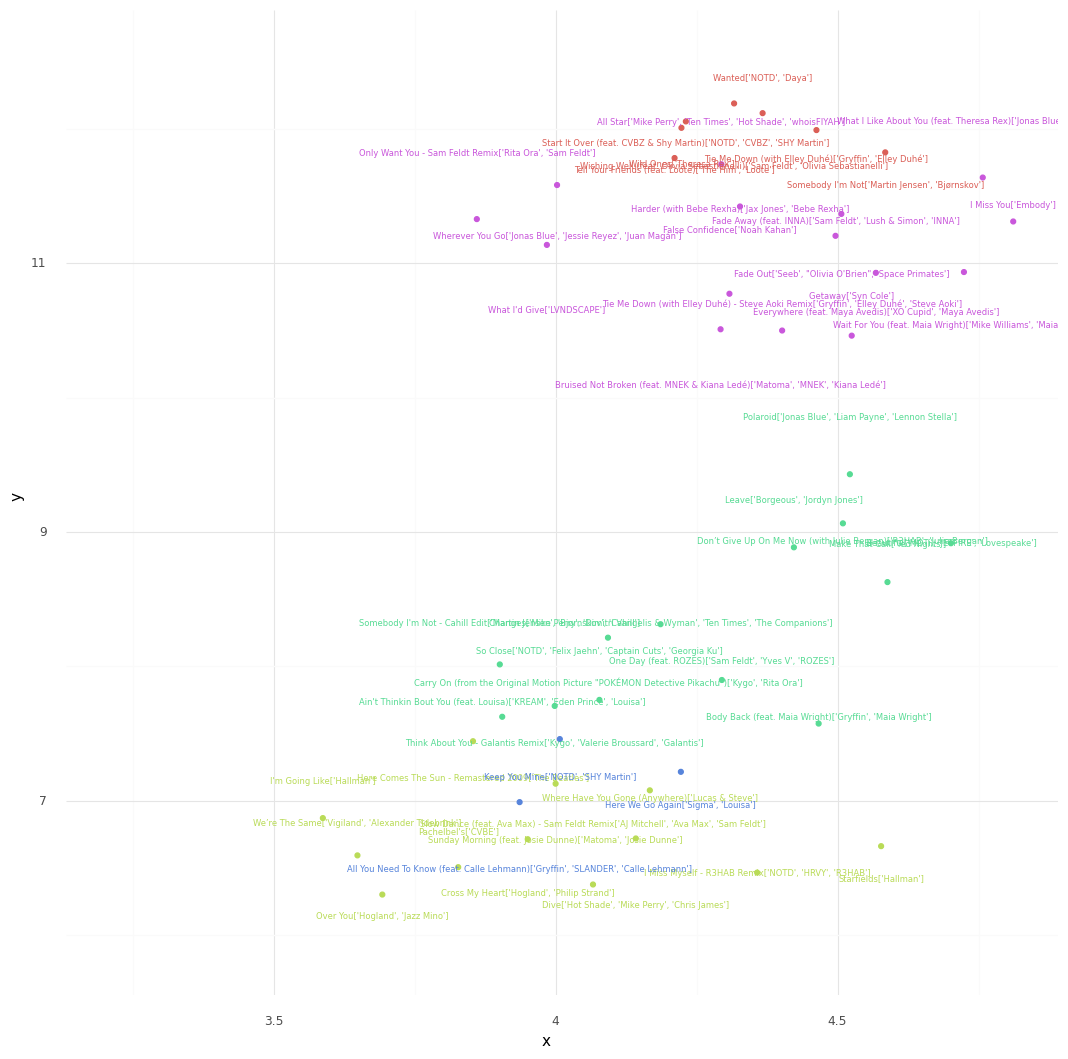

<ggplot: (8790508107451)>

In [149]:
(
    p9.ggplot(joined) + 
    p9.geom_point(p9.aes(x='x', y='y', color='labels'),  show_legend=False) +
    p9.geom_text(p9.aes(x='x', y='y', label='text', color='factor(labels)', size=5), show_legend=False, position=p9.position_jitterdodge(jitter_height=0.5)) + 
    p9.theme_minimal()
)

In [144]:
import plotly.express as px

In [193]:
px.scatter_3d(joined, x='x',y='y', z='z', color='labels', hover_data=['text', *columns])

# PCA

In [148]:
from sklearn.decomposition import PCA

In [190]:
pca = PCA(n_components=2)
pca_result = pca.fit(features[columns])
transform = pd.DataFrame(pca.transform(features[columns]), columns=["PC0", "PC1"])
transform['labels'] = kmean_model.labels_
transform['labels'] = transform['labels'].astype('category')

In [178]:
args = np.argmax(pca.components_, axis=1)
print('Dominant columns {} and {}'.format(columns[args[0]], columns[args[1]]))

Dominant columns tempo and loudness


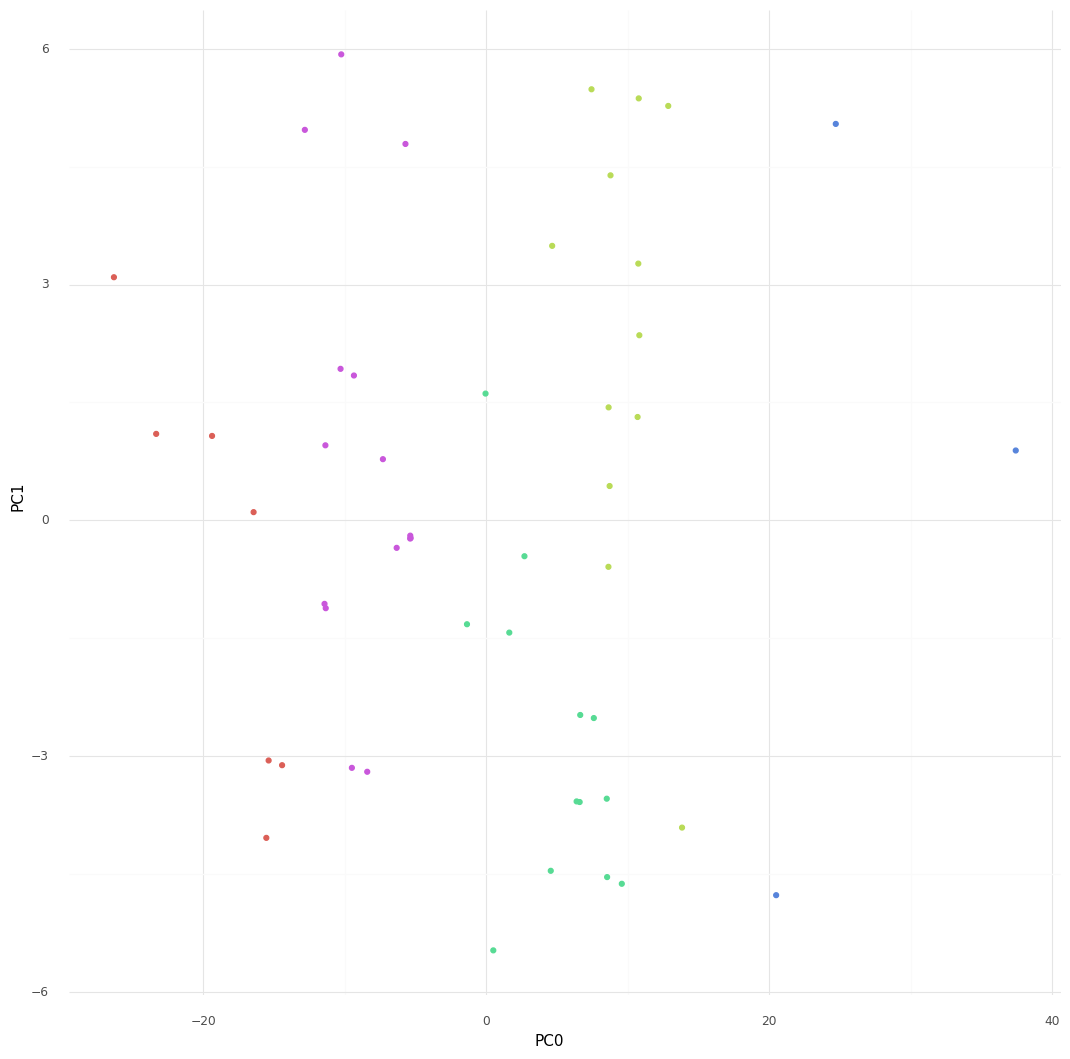

<ggplot: (8790507869690)>

In [191]:
(
    p9.ggplot(transform) + 
    p9.geom_point(p9.aes(x='PC0', y='PC1', color='labels'),  show_legend=False) +
    p9.theme_minimal()
)